# Hybrid LSTM-Based Renewable Energy Forecasting & Grid Optimization  

**Author**: Srikar Kalle

In [ ]:
# Importing all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Loading & Preprocessing  

In this section, we load and clean two datasets:  
- **NASA Dataset** – provides climate and atmospheric variables  
- **Master Dataset** – includes historical renewable energy generation 

In [ ]:
# Reading weather and energy market CSV files
weather_df = pd.read_csv("../data/ireland_weather_master.csv", parse_dates=['date'])
market_df = pd.read_csv("../data/energy_market_prices.csv", parse_dates=['date'])

In [ ]:
# Ensuring that 'date' columns are in datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])
market_df['date'] = pd.to_datetime(market_df['date'])

In [ ]:
# Printing data types of columns
print("Weather columns:\n", weather_df.dtypes)
print("Market columns:\n", market_df.dtypes)

Weather columns:
 date                datetime64[ns]
county                      object
temperature                float64
solar_irradiance           float64
wind_speed                 float64
precipitation              float64
dtype: object
Market columns:
 date       datetime64[ns]
FSLR              float64
SPWR              float64
ENPH              float64
SEDG              float64
NEE               float64
CL=F              float64
BZ=F              float64
NG=F              float64
COAL.AX           float64
XLE               float64
dtype: object


In [ ]:
# Merging the two datasets on the 'date' column
master_df = pd.merge(weather_df, market_df, on='date', how='inner')

In [ ]:
master_df.to_csv("../data/final_master_dataset.csv", index=False)

In [ ]:
print("Merge complete. Final dataset shape:", master_df.shape)
print(master_df.head())

Merge complete. Final dataset shape: (86745, 16)
        date     county  temperature  solar_irradiance  wind_speed  \
0 2015-01-02  Antrim_IE         3.93              0.80        6.40   
1 2015-01-05  Antrim_IE         7.43              0.26        4.59   
2 2015-01-06  Antrim_IE         4.21              0.82        4.45   
3 2015-01-07  Antrim_IE         7.41              0.18        7.65   
4 2015-01-08  Antrim_IE         4.31              0.80        6.25   

   precipitation       FSLR  SPWR   ENPH  SEDG        NEE       CL=F  \
0           1.08  44.549999   NaN  14.21   NaN  20.324467  52.689999   
1           1.11  41.830002   NaN  13.88   NaN  20.109201  50.040001   
2           3.49  40.860001   NaN  12.94   NaN  20.187305  47.930000   
3           7.72  41.750000   NaN  11.40   NaN  20.372086  48.650002   
4           2.79  43.630001   NaN  11.73   NaN  20.495911  48.790001   

        BZ=F   NG=F  COAL.AX        XLE  
0  56.419998  3.003      NaN  52.310993  
1  53.110001 

In [ ]:
# Reading the saved merged dataset again
df = pd.read_csv('../data/final_master_dataset.csv', parse_dates=['date'])

In [ ]:
print("Basic Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86745 entries, 0 to 86744
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              86745 non-null  datetime64[ns]
 1   county            84480 non-null  object        
 2   temperature       86745 non-null  float64       
 3   solar_irradiance  86745 non-null  float64       
 4   wind_speed        86745 non-null  float64       
 5   precipitation     86745 non-null  float64       
 6   FSLR              86680 non-null  float64       
 7   SPWR              15796 non-null  float64       
 8   ENPH              86680 non-null  float64       
 9   SEDG              84799 non-null  float64       
 10  NEE               86680 non-null  float64       
 11  CL=F              86646 non-null  float64       
 12  BZ=F              86679 non-null  float64       
 13  NG=F              86679 non-null  float64       
 14  CO

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['COAL.AX', 'SPWR'])

In [ ]:
# Replace missing county names with Unknown
df['county'] = df['county'].fillna('Unknown')

In [ ]:
# forward fill market data
market_cols = ['FSLR', 'ENPH', 'SEDG', 'NEE', 'CL=F', 'BZ=F', 'NG=F', 'XLE']
df[market_cols] = df[market_cols].fillna(method='ffill')

# mean imputation for weather data
weather_cols = ['temperature', 'solar_irradiance', 'wind_speed', 'precipitation']
df[weather_cols] = df[weather_cols].fillna(df[weather_cols].mean())
df['SEDG'] = df['SEDG'].interpolate(method='linear')

/tmp/ipython-input-13-1975364809.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[market_cols] = df[market_cols].fillna(method='ffill')


In [ ]:
# Sort by date and reset index
df = df.sort_values('date').reset_index(drop=True)
df['SEDG'] = df['SEDG'].fillna(method='ffill')
df['SEDG'] = df['SEDG'].fillna(method='bfill')

/tmp/ipython-input-14-2511756561.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SEDG'] = df['SEDG'].fillna(method='ffill')
/tmp/ipython-input-14-2511756561.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SEDG'] = df['SEDG'].fillna(method='bfill')


In [ ]:
print(df.isnull().sum())

date                0
county              0
temperature         0
solar_irradiance    0
wind_speed          0
precipitation       0
FSLR                0
ENPH                0
SEDG                0
NEE                 0
CL=F                0
BZ=F                0
NG=F                0
XLE                 0
dtype: int64


In [ ]:
print(df.dtypes)

date                datetime64[ns]
county                      object
temperature                float64
solar_irradiance           float64
wind_speed                 float64
precipitation              float64
FSLR                       float64
ENPH                       float64
SEDG                       float64
NEE                        float64
CL=F                       float64
BZ=F                       float64
NG=F                       float64
XLE                        float64
dtype: object


In [ ]:
print(df.describe(include='all'))

                                 date     county   temperature  \
count                           86745      86745  86745.000000   
unique                            NaN         33           NaN   
top                               NaN  Antrim_IE           NaN   
freq                              NaN       2640           NaN   
mean    2020-03-23 13:14:13.716064256        NaN      9.803700   
min               2015-01-02 00:00:00        NaN     -3.270000   
25%               2017-08-11 00:00:00        NaN      6.630000   
50%               2020-03-24 00:00:00        NaN      9.810000   
75%               2022-10-31 00:00:00        NaN     13.230000   
max               2025-06-30 00:00:00        NaN     24.890000   
std                               NaN        NaN      4.305919   

        solar_irradiance    wind_speed  precipitation          FSLR  \
count       86745.000000  86745.000000   86745.000000  86745.000000   
unique               NaN           NaN            NaN           N

In [ ]:
print("duplicate rows:", df.duplicated().sum())

duplicate rows: 0


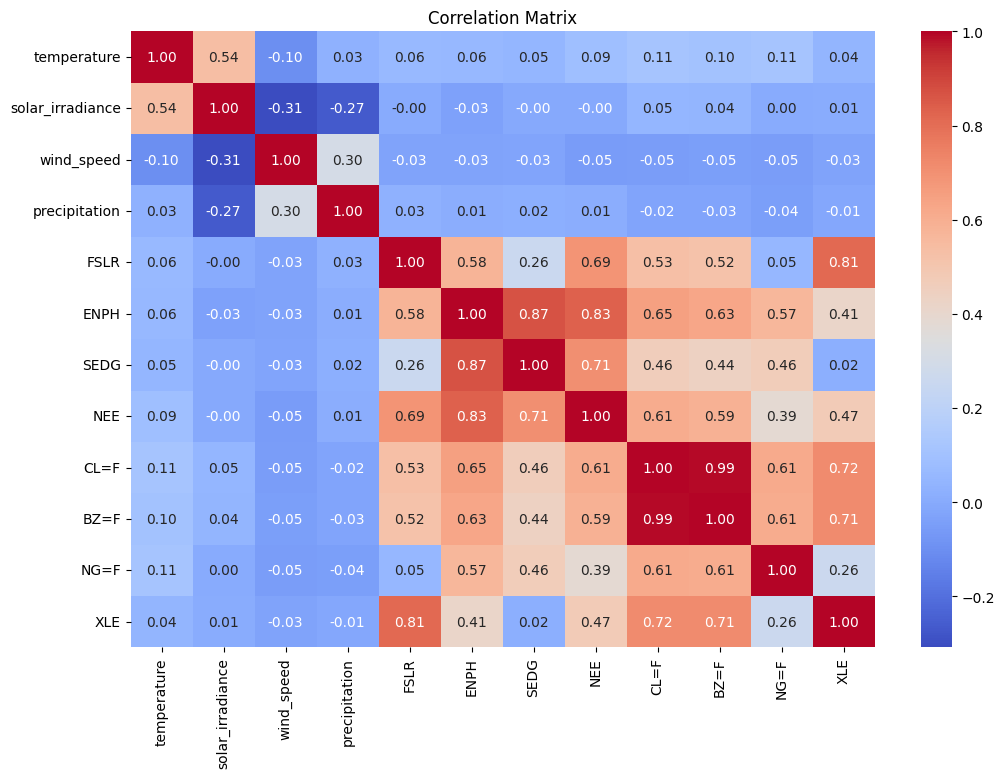

In [ ]:
# only numeric columns and plot correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['FSLR', 'ENPH', 'SEDG', 'NEE', 'CL=F', 'BZ=F', 'NG=F', 'XLE']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature        VIF
0   const  40.989049
1    FSLR  10.293904
2    ENPH  17.151436
3    SEDG  13.875916
4     NEE   4.805235
5    CL=F  56.240503
6    BZ=F  51.333150
7    NG=F   3.352746
8     XLE  13.098350


In [ ]:
# Perform PCA on selected market features after scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['FSLR', 'ENPH', 'SEDG', 'NEE', 'CL=F', 'NG=F', 'XLE']]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

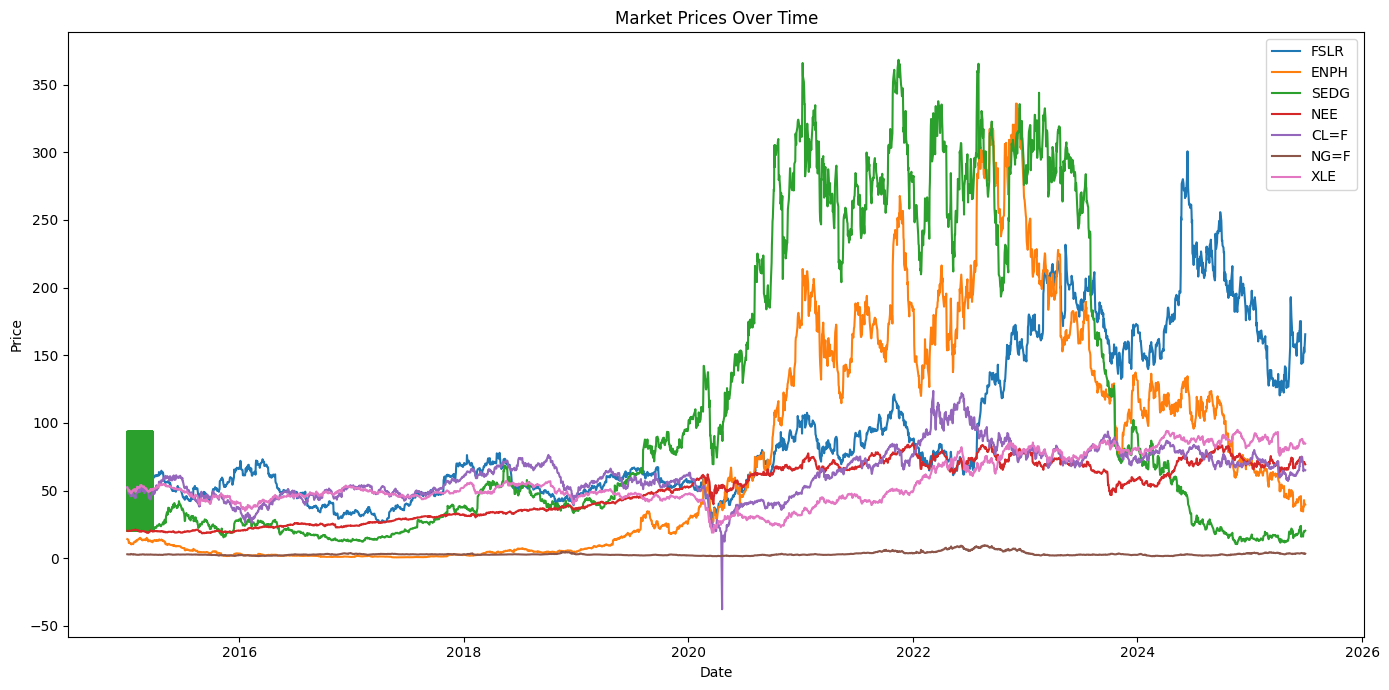

In [ ]:
# Line plot for market prices
plt.figure(figsize=(14, 7))
for col in ['FSLR', 'ENPH', 'SEDG', 'NEE', 'CL=F', 'NG=F', 'XLE']:
    plt.plot(df['date'], df[col], label=col)

plt.title('Market Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

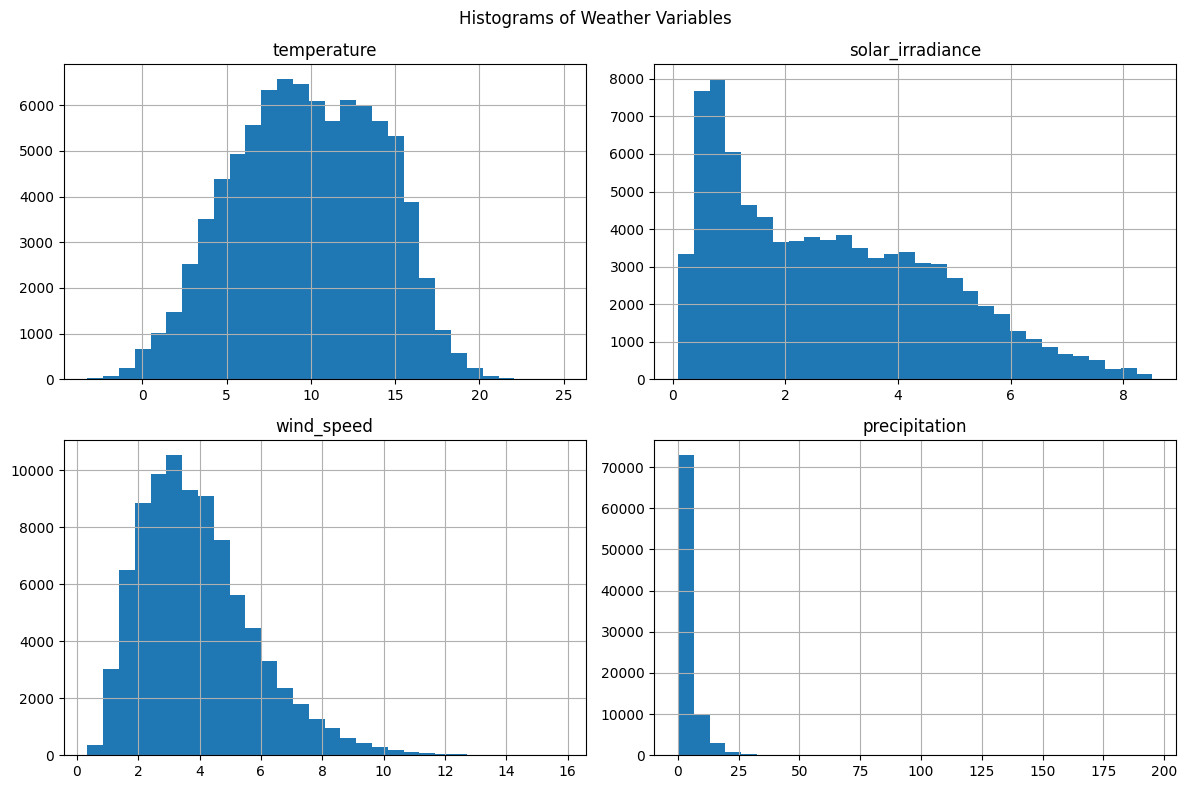

In [ ]:
# Histogram of weather variables
df[['temperature', 'solar_irradiance', 'wind_speed', 'precipitation']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Weather Variables')
plt.tight_layout()
plt.show()

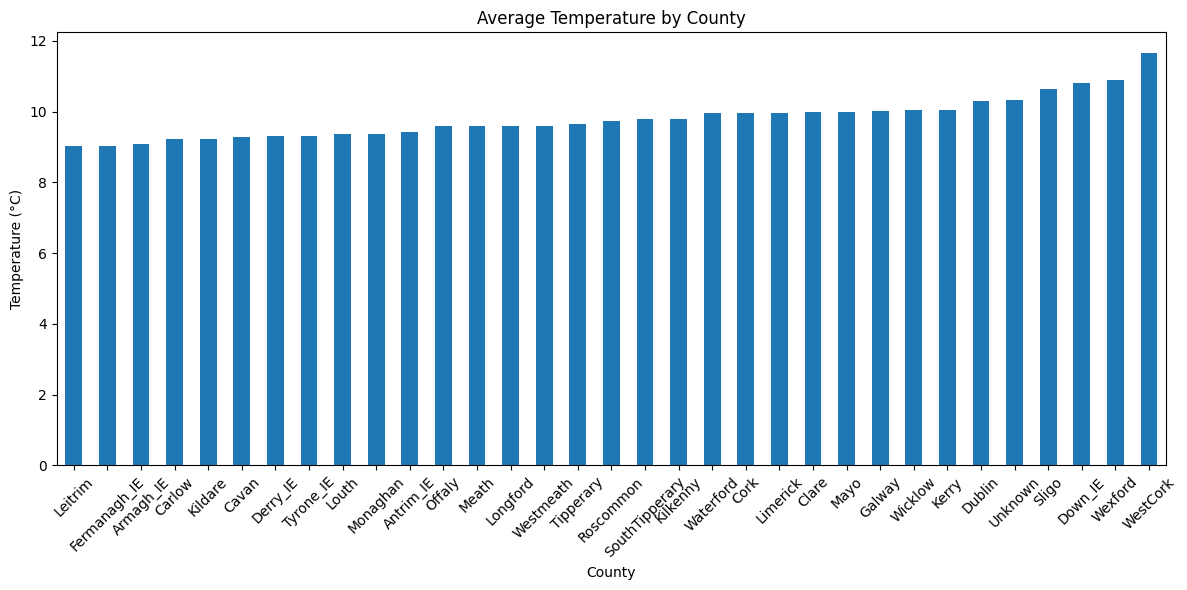

In [ ]:
# Average temperature per county
plt.figure(figsize=(12, 6))
df.groupby('county')['temperature'].mean().sort_values().plot(kind='bar')
plt.title('Average Temperature by County')
plt.ylabel('Temperature (°C)')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LSTM Model for Forecasting

In [ ]:
# Prepare data for LSTM model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
# required columns for LSTM and drop rows with NaN
df_lstm = df[['FSLR', 'temperature', 'solar_irradiance', 'wind_speed', 'precipitation']].dropna()

In [ ]:
# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

In [ ]:
# Function to create sequences
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 1:])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
# Create sequences
time_steps = 30
X, y = create_sequences(scaled_data, time_steps)

# Split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Define the LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.1, verbose=1)

Epoch 1/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 61s 29ms/step - loss: 0.0051 - val_loss: 0.1371
Epoch 2/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 89s 33ms/step - loss: 0.0045 - val_loss: 0.1378
Epoch 3/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - loss: 0.0044 - val_loss: 0.1408
Epoch 4/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - loss: 0.0044 - val_loss: 0.1369
Epoch 5/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - loss: 0.0045 - val_loss: 0.1394
Epoch 6/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - loss: 0.0044 - val_loss: 0.1380
Epoch 7/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0044 - val_loss: 0.1329
Epoch 8/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.0044 - val_loss: 0.1370
Epoch 9/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - loss: 0.0043 - val_loss: 0.1419
Epoch 10/10
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 0.0044 - val_loss: 0.1360


In [ ]:
# Predict and Inverse Scale
y_pred = model.predict(X_test)

# Inverse transform predictions and actual
dummy_test = np.zeros((len(y_pred), scaled_data.shape[1]))
dummy_test[:, 0] = y_pred.ravel()
y_pred_inv = scaler.inverse_transform(dummy_test)[:, 0]

dummy_test[:, 0] = y_test
y_test_inv = scaler.inverse_transform(dummy_test)[:, 0]

542/542 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


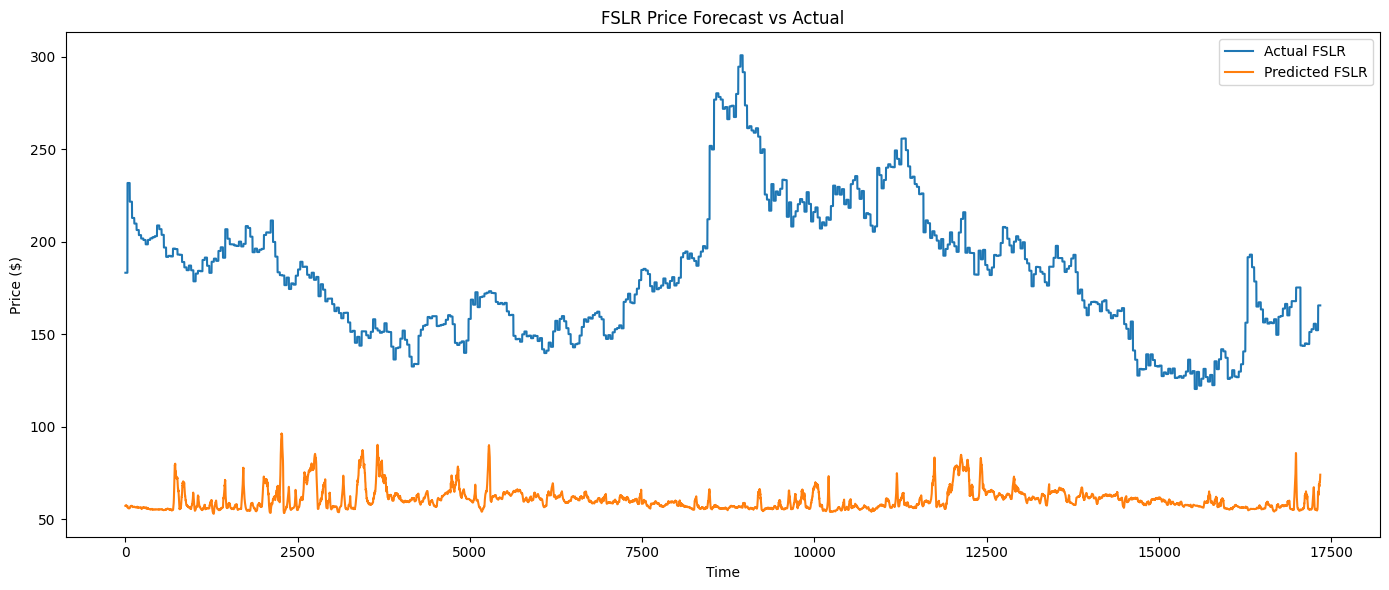

In [ ]:
# Evaluate and Visualize
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual FSLR')
plt.plot(y_pred_inv, label='Predicted FSLR')
plt.title('FSLR Price Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {rmse:.2f}')

RMSE: 126.22


## Random Forest Regression

In [ ]:
df['FSLR_MA7'] = df['FSLR'].rolling(window=7).mean()
df['FSLR_MA21'] = df['FSLR'].rolling(window=21).mean()

# Relative Strength Index
delta = df['FSLR'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Lag features
df['FSLR_lag1'] = df['FSLR'].shift(1)
df['FSLR_lag2'] = df['FSLR'].shift(2)

# Rolling statistics
df['FSLR_rolling_std_7'] = df['FSLR'].rolling(window=7).std()
df['FSLR_rolling_std_21'] = df['FSLR'].rolling(window=21).std()

# Drop NA
df.dropna(inplace=True)

In [ ]:
# Define features
features = ['FSLR', 'FSLR_MA7', 'FSLR_MA21', 'RSI_14', 'FSLR_lag1', 'FSLR_lag2',
            'FSLR_rolling_std_7', 'FSLR_rolling_std_21']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

df_scaled = pd.DataFrame(scaled_data, columns=features, index=df.index)

In [ ]:
# Standardize the feature data
from sklearn.model_selection import train_test_split

X = df_scaled.drop('FSLR', axis=1)
y = df_scaled['FSLR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate RMSE
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.1960


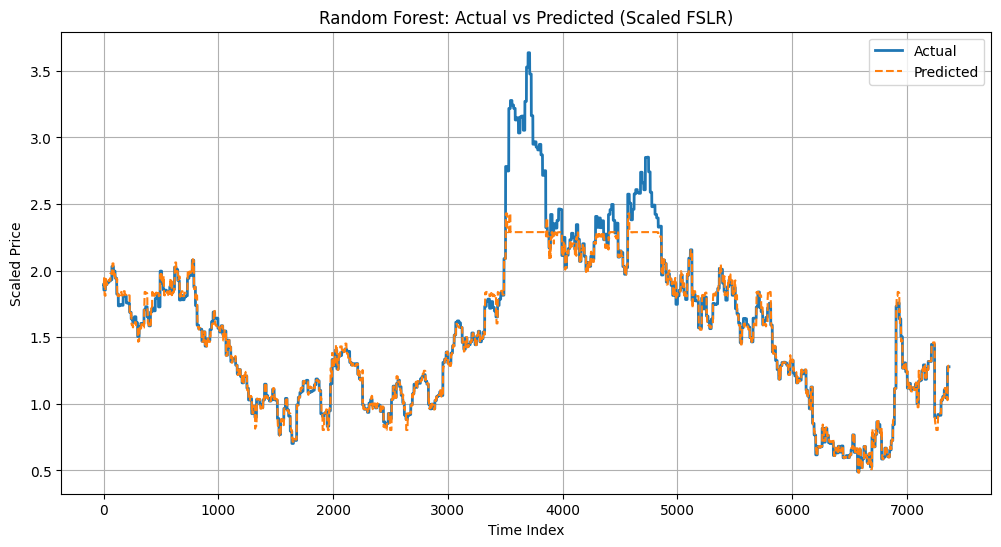

In [ ]:
# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Random Forest: Actual vs Predicted (Scaled FSLR)')
plt.xlabel('Time Index')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost Regression

In [ ]:
import xgboost as xgb
# Initialize XGBoost regressor with parameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=5,
                              random_state=42)
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.4f}")

XGBoost RMSE: 0.2230


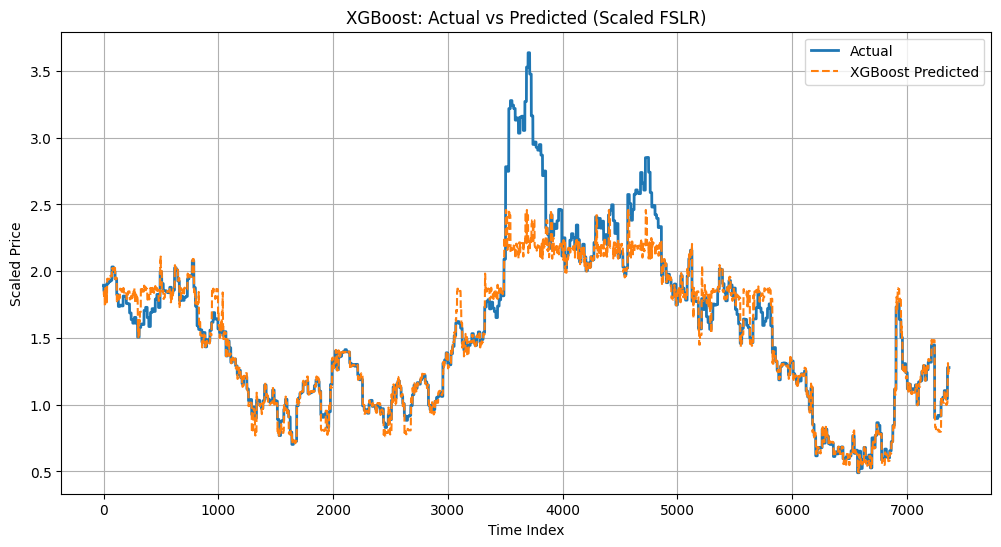

In [ ]:
# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_xgb, label='XGBoost Predicted', linestyle='--')
plt.title('XGBoost: Actual vs Predicted (Scaled FSLR)')
plt.xlabel('Time Index')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)
plt.show()

# Grid Risk Simulation

In [ ]:
# Suppose y_test and y_pred_xgb are our actual and predicted values
df_grid_rf = pd.DataFrame({
    'actual': y_test.values.flatten(),
    'forecast': y_pred.flatten()
})

# Calculate imbalance between actual and forecast values
df_grid_rf['imbalance'] = df_grid_rf['actual'] - df_grid_rf['forecast']

# Define risk levels based on imbalance thresholds
df_grid_rf['risk'] = pd.cut(df_grid_rf['imbalance'],
                            bins=[-np.inf, -20, 20, np.inf],  # thresholds for risk
                            labels=['Under-supply', 'Balanced', 'Over-supply'])

In [ ]:
# Show first 10 row
print("Preview of Risk Simulation:")
print(df_grid_rf.head(10))

# Show count of each risk category
print("\nRisk Category Counts:")
print(df_grid_rf['risk'].value_counts())

# Show percentage of each risk category
print("\nRisk Category Percentages:")
print(df_grid_rf['risk'].value_counts(normalize=True) * 100)

Preview of Risk Simulation:
     actual  forecast     imbalance      risk
0  1.895134  1.895134 -3.108624e-15  Balanced
1  1.895134  1.895134 -3.108624e-15  Balanced
2  1.895134  1.895134 -3.108624e-15  Balanced
3  1.854319  1.894865 -4.054661e-02  Balanced
4  1.854319  1.928097 -7.377788e-02  Balanced
5  1.854319  1.951743 -9.742457e-02  Balanced
6  1.854319  1.928993 -7.467441e-02  Balanced
7  1.854319  1.928993 -7.467441e-02  Balanced
8  1.854319  1.927660 -7.334181e-02  Balanced
9  1.854319  1.815567  3.875189e-02  Balanced

Risk Category Counts:
risk
Balanced        7367
Under-supply       0
Over-supply        0
Name: count, dtype: int64

Risk Category Percentages:
risk
Balanced        100.0
Under-supply      0.0
Over-supply       0.0
Name: proportion, dtype: float64
